In [9]:
#importing necessary libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [18]:
#Function to convert gray images to RGB
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [19]:
#Load YOLO
net = cv2.dnn.readNet("yolov3.weights","yolov3.cfg")
#Load classes
classes = []
with open("coco.names","r") as f:
    classes = [line.strip() for line in f.readlines()]

In [20]:
layers_names = net.getLayerNames()
output_layers = [layers_names[i[0]-1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

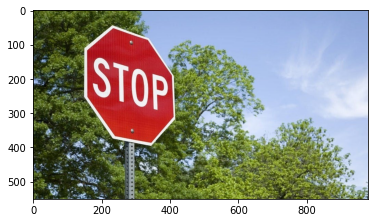

In [21]:
#loading image
img = cv2.imread("image.jpg")
plt.imshow(convertToRGB(img))
# img = cv2.resize(img,None,fx=0.4,fy=0.3)
height,width,channels = img.shape

In [22]:
blob = cv2.dnn.blobFromImage(img, scalefactor=0.00392, size=(320, 320), mean=(0, 0, 0), swapRB=True, crop=False)
net.setInput(blob)
outputs = net.forward(output_layers)

In [23]:
class_ids=[]
confidences=[]
boxes=[]
for out in outputs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            #onject detected
            center_x= int(detection[0]*width)
            center_y= int(detection[1]*height)
            w = int(detection[2]*width)
            h = int(detection[3]*height)
        
            
            #rectangle co-ordinaters
            x=int(center_x - w/2)
            y=int(center_y - h/2)
            
            boxes.append([x,y,w,h]) #put all rectangle areas
            confidences.append(float(confidence)) #how confidence was that object detected and show that percentage
            class_ids.append(class_id) #name of the object tha was detected


In [27]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x,y), (x+w, y+h), color, 2)
        cv2.putText(img, label, (x, y - 5), font, 1.5, color, 2)

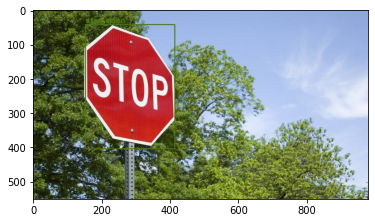

In [28]:
# cv2.imshow("Image",img)
plt.imshow(convertToRGB(img))